In [5]:
from keras import Model, models
from keras.models import load_model
from matplotlib import pyplot as plt
from keras.preprocessing import image
from keras.utils import plot_model
from pyimagesearch import config
from imutils import paths
import numpy as np
import pyimagesearch.config
import imutils
import random
import cv2
import os
import keras.backend as K

## 加载模型

In [11]:
# model: Model = load_model(r'F:\Code\DL\smog-detection\viev\smog_detection_resnet50.model')
model: Model = load_model(r'F:\Code\DL\smog-detection\viev\model_best.h5')
layer_outputs = [layer.output for layer in model.layers[1:10]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activation_model.summary()

OSError: Unable to open file (truncated file: eof = 16384, sblock->base_addr = 0, stored_eof = 334574240)

## 加载图片

In [7]:
imagePath = r"F:\data_set\smog_data\smog\42112600001310000926_2018-10-13 15-42-47.jpg"
img = cv2.imread(imagePath)

img = cv2.resize(img, (128, 128))
img = img.astype("float32") / 255.0

img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

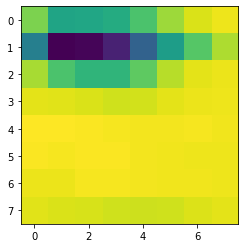

In [8]:
smog_output = model.output[:,1]
last_conv_layer = model.get_layer('bn4f_branch2c')
grads = K.gradients(smog_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([img_tensor])
for i in range(1024):
    conv_layer_output_value[:, :, 1] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)
# heatmap = np.maximum(heatmap, 0)
heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))
plt.imshow(heatmap)
plt.show()

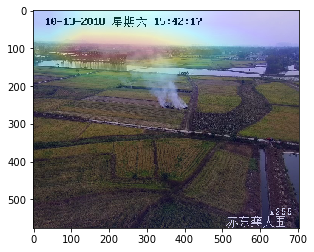

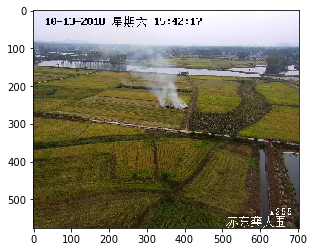

In [9]:
orgImg = cv2.imread(imagePath)
heatmapImg = cv2.resize(heatmap, (orgImg.shape[1], orgImg.shape[0]))
heatmapImg = np.uint8(255 * heatmapImg)
heatmapImg = cv2.applyColorMap(heatmapImg, cv2.COLORMAP_JET)
superimpose_img = cv2.cvtColor(heatmapImg, cv2.COLOR_BGR2RGB) * 0.2 + orgImg * 0.8
plt.imshow(superimpose_img[...,[2,1,0]] / 255)
plt.show()
plt.imshow(orgImg[...,[2,1,0]])
plt.show()

In [10]:
preds = model.predict(img_tensor)
j = np.argmax(preds)
label = config.CLASSES[j]
print(label)

Fire
